# CNN: Convolutional Neural Network
* is working as '**Feature Extractor**'
* processes data in 2-dimention
* is more advantageous to process image data than other neural network model

![CNN.png](CNN.png)

Image Learning process using CNN is largely into two processes.

1. CNN: Feature Extraction
    * **Convolution Layer**: Extract feature of image.
    * **Pooling Layer**: Enhance feature as pooling representative value.
    * By repeating processes above, feature extraction leaves only concise features that can distinguish images, and deletes detailed that is not conducive.
    
2. FCN (Fully Connected Network): Classification
    * **Flatten Layer**: Flatten the feature-extracted image data. (Convert dimension from 2 to 1)
    * **Fully Connected Layer**: Learns feature-extracted flatted image data.
    * FCN can be made of DNN.


(cf. [taewan.kim](http://taewan.kim/post/cnn/))

## Convolution (합성곱)
* is a mathematical operation on two functions ($f$ and $g$) that produces a third function ($f*g$) that expresses how the shape of one is modified by the other. 
* definition:

$$(f*g)(c):= \sum_{a+b=c} f(a) \cdot g(b)$$

* definition above can be rewritten as:

$$(f*g)(c):= \sum_{a} f(a) \cdot g(c-a)$$


* Convolution extended to 2-dimension:

$$(f*g)(c_1,c_2):= \sum_{{a_1+b_1=c_1}, {a_2+b_2=c_2}} f(a_1,a_2) \cdot g(b_1,b_2)$$

<br>

$$(f*g)(c_1,c_2):= \sum_{a_1,a_2} f(a_1,a_2) \cdot g(c_1-a_1,c_2-a_2)$$

eg.)

$$
{Image}=
\begin{pmatrix}
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 0
\end{pmatrix} ,\quad
{filter}=
\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix}
$$

<br>

$$
(Image*filter)=
\begin{pmatrix}
4 & 3 & 4 \\
2 & 4 & 3 \\
2 & 3 & 4
\end{pmatrix}
$$


![Convolution_schematic.gif](Convolution_schematic.gif)

(Figure from [stanford.edu](http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/))

# Convolutional Layer
* Assume that $4 \times 4$ size of image with color (R,G,B) given.
* ```image.shape >>> (4,4,3)```
* $3 \times 3$ size of filter (kernel) generated.

1. Conduct convolution between each channel and corresponding filter.
2. Add up all convolution result from each channel.

![convolutional_layer.png](convolutional_layer.png)

## Stride
* is a parameter of the neural network's filter that modifies the amount of movement over the image or video.
* Default convolution can be considered as ```stride=1```

## Zero padding
* is adding zeros around original image.
* prevents shrinkig. (filter size and stride contribute to shrink. see formula below.)

![ZeroPadding.png](ZeroPadding.png)

## Formula for output data size of convolution layer
* $W_I$: Width of original image data
* $H_I$: Height of original image data
* $W_F$: Width of filter(kernel)
* $H_F$: Height of filter(kernel)
* $P$: Padding Size
* $S$: Size of stride
* $W_O$: Width of output data
* $H_O$: Height of output data
for given variables above,
$$W_O = \frac{W_I+2P-W_F}{S} + 1$$
$$H_O = \frac{H_I+2P-H_F}{S} + 1$$

* Note that size of output data must be natural number. If not, Round Up or Down. (Depend on library or etc.)

eg.)

* $32 \times 32 \times 1$ image
* 6 of $5 \times 5 \times 1$ filters
* Stride = 1
* No zero padding

* in convolution2D in ```tensorflow.nn```:
```python
import tensorflow
import numpy
image=image.reshape(-1,32,32,1) 
filter=tensorflow.random.normal([5,5,1,6], stddev=0.01)
convoultion=tensorflow.nn.conv2d(image, filter, strides=[1,2,2,1], padding='VALID')
print(convloution.numpy().shape)
```

* in keras:
```python
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.summary()
```

* 6 of $28 \times 28 \times 1$ image generated.

![convolutional_layer2.png](convolutional_layer2.png)

Convolution seems to distort data, but it emphasizes significant features and omits data that is less important.

# Pooling Layer
* summarize image as a representative value.
* Average Pooling: sampling average value
* Min Pooling: sampling min value
* Max Pooling: sampling max value
* Max Pooling is most frequently used.
* Generally set filter size same with stride so that all element can be processed.

eg)
* $4 \times 4$ image data
* $2 \times 2$ filters
* stride=2
![pooling_layer.png](pooling_layer.png)

* in convolution2D in ```tensorflow.nn```:
```python
import tensorflow
import numpy
image=image.reshape(-1,32,32,1) 
filter=tensorflow.random.normal([5,5,1,6], stddev=0.01)
convoultion=tensorflow.nn.conv2d(image, filter, strides=[1,2,2,1], padding='VALID')
pool=tensorflow.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pool_img=pool.numpy()
```

* in keras:
```python
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.summary()
```

# Toy Image

(1, 3, 3, 1)


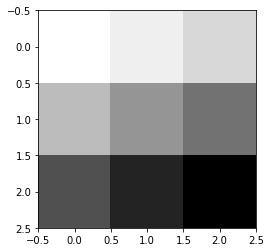

weight.shape (2, 2, 1, 1)
conv2d_img [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate Simple Toy Image
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

print (image.shape)
plt.grid(False)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID') # tensor
conv2d_img=conv2d.numpy()
print ("conv2d_img",conv2d_img )

In [13]:
image=np.array([[[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print (image.shape)
weight=tf.constant([[[[1.],[1.],[1.]],[[1.],[1.],[1.]]],
                    [[[1.],[1.],[1.]],[[1.],[1.],[1.]]]])
print ("weight.shape", weight.shape)

conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img", conv2d_img )

(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d_img [[[[36.]
   [48.]]

  [[72.]
   [84.]]]]


weight.shape (2, 2, 1, 3)
conv2d_img (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


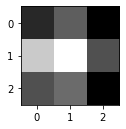

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


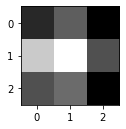

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


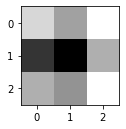

In [15]:
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

weight=tf.constant([[[[1.,10., -1.]],[[1.,10., -1.]]],
                    [[[1.,10., -1.]],[[1.,10., -1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img=conv2d.numpy()
print ("conv2d_img",conv2d_img.shape )

# plotting Code
conv2d_img=np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    print (one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.grid(False), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

# MNIST Dataset

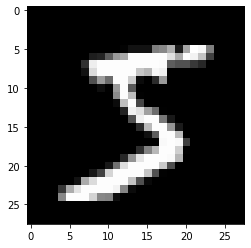

tf.Tensor(
[[[[ 9.88558773e-03  1.61683857e-02 -2.18026061e-03 -8.24886025e-04
    -1.15076816e-02]]

  [[ 7.64674367e-03  5.58415754e-03 -6.60852948e-03 -6.13659853e-03
     5.84628573e-03]]

  [[ 1.23052066e-02 -1.19329139e-03  3.93832428e-03  2.56210612e-03
     1.84033737e-02]]]


 [[[ 8.65097065e-03 -3.50015529e-04 -9.40377417e-04  6.60728430e-03
    -1.40509363e-02]]

  [[ 8.24012607e-03  2.17522681e-03  4.64887824e-03  2.54667569e-02
     1.31046176e-02]]

  [[-1.89425691e-03  1.24581624e-02 -1.70507692e-02  1.72138344e-02
    -7.67513458e-03]]]


 [[[ 1.82515578e-04 -1.05646125e-03 -1.01851765e-03  8.02700597e-05
     2.00478099e-02]]

  [[ 9.00791585e-03  2.15482339e-03  3.23358085e-03 -6.50786143e-03
    -6.62610354e-03]]

  [[-1.30050285e-02 -4.28095460e-03  1.15778549e-02  6.20671129e-03
    -5.96488686e-03]]]], shape=(3, 3, 1, 5), dtype=float32)


In [6]:
# load MNIST Dataset

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()

img=img.reshape(-1,28,28,1) # 60000 data, 28*28 size, 1 color channel
W1=tf.random.normal([3,3,1,5], stddev=0.01) # 3*3 size, 1 color channel filter x 5 sheet
print(W1)

In [7]:
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='VALID') # convolutional layer with W1 filter, 2*2 stride 
conv2d_img=conv2d.numpy() # convert tensor to numpy
print(conv2d_img.shape) # ((28-3)/2 + 1) = 13.5 ~~ 13

(1, 13, 13, 5)


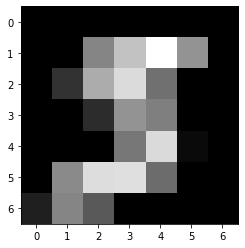

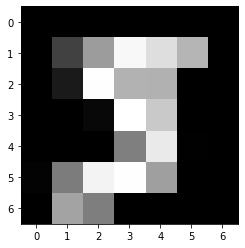

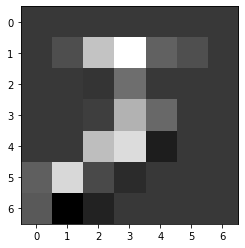

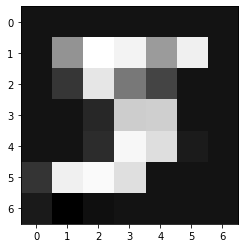

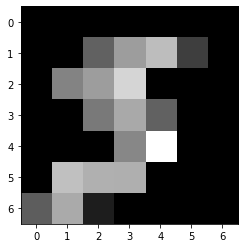

In [11]:
pool=tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # max pooling layer
pool_img=pool.numpy()
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    #plt.subplot(3,2,i+1)
    plt.imshow(one_img.reshape(7,7), cmap='gray')
    plt.show()#
#plt.show()

While passing the convolutional layer and pooling layer, distinguishable features of the image were abridged into simpler images.

These abridged image has more significant feature to predict.